# Ch01. Playlist

## 1. 중복곡 찾기

In [1]:
import plistlib

def findDuplicates(fileName):
    print('중복곡을 찾습니다..(%s)' %fileName)
    plist = plistlib.readPlist(fileName)
    tracks = plist['Tracks']
    trackNames = {}
    for trackId, track in tracks.items():
        try:
            name = track['Name']
            duration = track['Total Time']
            if name in trackNames:
                if duration//1000 == trackNames[name][0]//1000:
                    count = trackNames[name][1]
                    trackNames[name] = (duration, count+1)
            else:
                trackNames[name] = (duration, 1)
        except:
            pass

In [2]:
findDuplicates('mymusic.xml')

중복곡을 찾습니다..(mymusic.xml)


c:\users\paul\desktop\gdg-busan\gdg-busan-python\venv\lib\site-packages\ipykernel\__main__.py:5: DeprecationWarning: The readPlist function is deprecated, use load() instead


## 2. deprecated 된 readPlist() 를 해결해보자

In [3]:
import plistlib

def findDuplicates2(fileName):
    print('중복곡을 찾습니다..(%s)' %fileName)
    with open(fileName,'rb') as fp:
        plist = plistlib.load(fp)
    tracks = plist['Tracks']
    trackNames = {}
    for trackId, track in tracks.items():
        try:
            name = track['Name']
            duration = track['Total Time']
            if name in trackNames:
                if duration//1000 == trackNames[name][0]//1000:
                    count = trackNames[name][1]
                    trackNames[name] = (duration, count+1)
            else:
                trackNames[name] = (duration, 1)
        except:
            pass

In [4]:
findDuplicates2('mymusic.xml')

중복곡을 찾습니다..(mymusic.xml)


## 3. 중복곡 추출하기

In [5]:
import plistlib

def findDuplicates3(fileName):
    print('중복곡을 찾습니다..(%s)' %fileName)
    
    # 파일을 열어서 파일객체를 전달한다
    with open(fileName,'rb') as fp:
        plist = plistlib.load(fp)
        
    tracks = plist['Tracks']
    trackNames = {}
    for trackId, track in tracks.items():
        try:
            name = track['Name']
            duration = track['Total Time']
            if name in trackNames:
                if duration//1000 == trackNames[name][0]//1000:
                    count = trackNames[name][1]
                    trackNames[name] = (duration, count+1)
            else:
                trackNames[name] = (duration, 1)
        except:
            pass
    
    dups = []
    for k,v in trackNames.items():
        if v[1] > 1:
            dups.append((v[1],k))
    
    if len(dups) > 0:
        print('%d 개의 중복곡을 찾았습니다. (dup.txt)' %len(dups))
    else:
        print('중복곡이 없습니다.')
    
    f = open('dups.txt', 'w')
    for val in dups:
        f.write('[%d] %s\n' %(val[0],val[1]) )
    f.close()

In [6]:
findDuplicates3('mymusic.xml')

중복곡을 찾습니다..(mymusic.xml)
108 개의 중복곡을 찾았습니다. (dup.txt)


## 4. 둘 이상의 재생목록에서 공통트랙 찾기

In [7]:
import plistlib

def findCommonTracks(fileNames):
    print('공통 중복곡을 찾습니다..(%s)' %fileNames)
    
    trackNameSets = []
    for fileName in fileNames:
        trackNames = set()
        with open(fileName,'rb') as fp:
            plist = plistlib.load(fp)
        tracks = plist['Tracks']
        for trackId,track in tracks.items():
            try:
                trackNames.add(track['Name'])
            except:
                pass
        trackNameSets.append(trackNames)
    
    commonTracks = set.intersection(*trackNameSets)
    if len(commonTracks) > 0:
        f = open('common-dups.txt','wb')
        for val in commonTracks:
            s = '%s\n' %val
            f.write(s.encode('UTF-8'))
        f.close()
        print('%d 개의 공통 중복곡을 찾았습니다. (common-dups.txt)' %len(commonTracks))
    else:
        print('공통 중복곡이 없습니다.')

In [8]:
findCommonTracks(['mymusic.xml','mymusic2.xml'])

공통 중복곡을 찾습니다..(['mymusic.xml', 'mymusic2.xml'])
134 개의 공통 중복곡을 찾았습니다. (common-dups.txt)


## 5. 통계 값 수집하기 & 그래프로 표현하기

In [9]:
import plistlib
import numpy as np
from matplotlib import pyplot

def plotStats(fileName):
    with open(fileName,'rb') as fp:
        plist = plistlib.load(fp)
    tracks = plist['Tracks']
    ratings = []
    durations = []
    for trackId,track in tracks.items():
        try:
            ratings.append(track['Album Rating'])
            durations.append(track['Total Time'])
        except:
            pass
    
    if ratings == [] or durations == []:
        print('재생시간 및 순위정보가 없습니다. (%s)' %fileName)
        return
    
    x = np.array(durations, np.int32)
    x = x/60000.0
    y = np.array(ratings, np.int32)
    
    pyplot.subplot(2,1,1)
    pyplot.plot(x,y,'o')
    pyplot.axis([0, 1.05*np.max(x), -1, 110])
    pyplot.xlabel('Track duration')
    pyplot.ylabel('Track rating')
    
    pyplot.subplot(2,1,2)
    pyplot.hist(x, bins=20)
    pyplot.xlabel('Track duration')
    pyplot.xlabel('Count')
    
    pyplot.show()

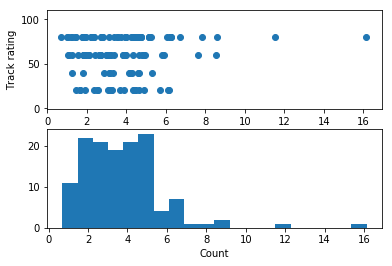

In [10]:
plotStats('mymusic.xml')